# Expectation Decider – Probability Project
Simple student friendly analysis


## Load Dataset

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

dataframe = pd.read_csv("students_expectation.csv")

dataframe.head()


,study_hours,attendance,group_discussion,previous_test_score,final_exam_pass
0,8,76,No,75,Pass
1,5,62,No,73,Pass
2,14,90,Yes,35,Pass
3,12,52,Yes,37,Fail
4,9,88,No,47,Pass


## Basic Info

In [7]:
dataframe.info()
dataframe.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   study_hours          200 non-null    int64 
 1   attendance           200 non-null    int64 
 2   group_discussion     200 non-null    object
 3   previous_test_score  200 non-null    int64 
 4   final_exam_pass      200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


,study_hours,attendance,previous_test_score
count,200.000000,200.000000,200.000000
mean,8.460000,75.395000,65.060000
std,3.737411,14.433663,17.838088
min,2.000000,50.000000,35.000000
25%,5.000000,65.000000,49.750000
50%,9.000000,77.000000,65.500000
75%,12.000000,86.000000,81.250000
max,14.000000,99.000000,94.000000


## 1. What is Probability?
Probability means chance of something happening.
Formula = favourable / total


### Example Events
1. Student passes exam
2. Student studies >10 hours
3. Student joins group discussion


## 2. Empirical Probability (Pass Exam)

In [12]:
total_students = len(dataframe)

pass_students = (dataframe["final_exam_pass"] == "Pass").sum()

prob_student_pass = pass_students / total_students

print("Total Students:", total_students)
print("Passed Students:", pass_students)
print("Probability of Passing:", round(prob_student_pass,3))


Total Students: 200
Passed Students: 156
Probability of Passing: 0.78


## 3. Random Variable (X = number of passes in 3 students)

In [14]:
prob_student_pass = pass_students / total_students

prob_student_fail = 1 - prob_student_pass

random_sample = np.array([0, 1, 2, 3])

print(f"Probability of One Student Passing: {prob_student_pass:.2f}")
print(f"Probability of One Student Failing: {prob_student_fail:.2f}")


prob_0_pass = prob_student_fail ** 3

prob_1_pass = 3 * prob_student_pass * (prob_student_fail ** 2)

prob_2_pass = 3 * (prob_student_pass ** 2) * prob_student_fail

prob_3_pass = prob_student_pass ** 3

print("\nProbability Distribution Table:")
print(f"0 Students Pass: {prob_0_pass:.4f}")
print(f"1 Student Passes: {prob_1_pass:.4f}")
print(f"2 Students Pass: {prob_2_pass:.4f}")
print(f"3 Students Pass: {prob_3_pass:.4f}")

probability_values = np.array([
    prob_0_pass,
    prob_1_pass,
    prob_2_pass,
    prob_3_pass
])

mean_value = np.sum(random_sample * probability_values)

variance_value = np.sum(((random_sample - mean_value) ** 2) * probability_values)

print(f"\nMean (Expected Pass Count): {mean_value:.3f}")
print(f"Variance: {variance_value:.3f}")

Probability of One Student Passing: 0.78
Probability of One Student Failing: 0.22

Probability Distribution Table:
0 Students Pass: 0.0106
1 Student Passes: 0.1133
2 Students Pass: 0.4015
3 Students Pass: 0.4746

Mean (Expected Pass Count): 2.340
Variance: 0.515


### Mean and Variance

In [15]:
probability_values = np.array([
    prob_0_pass,
    prob_1_pass,
    prob_2_pass,
    prob_3_pass
])

mean_value = np.sum(random_sample * probability_values)

variance_value = np.sum(((random_sample - mean_value)**2) * probability_values)

print("Mean:", round(mean_value,3))
print("Variance:", round(variance_value,3))


Mean: 2.34
Variance: 0.515


## 4. Venn Diagram Conditions

In [16]:
study_more_10 = dataframe[dataframe.study_hours > 10]
attendance_more_80 = dataframe[dataframe.attendance > 80]

both_conditions = pd.merge(study_more_10, attendance_more_80)

print("Study >10:", len(study_more_10))
print("Attendance >80:", len(attendance_more_80))
print("Both:", len(both_conditions))


Study >10: 70
Attendance >80: 87
Both: 29


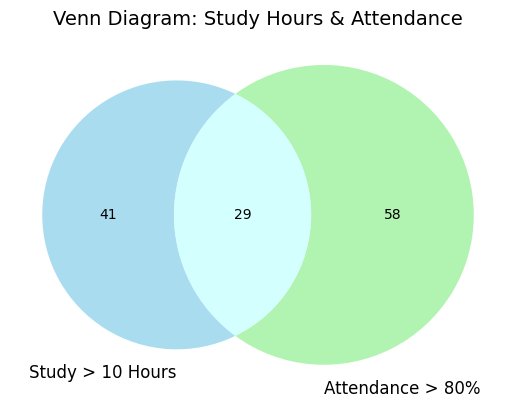

In [ ]:

study_more_10 = set(dataframe[dataframe.study_hours > 10].index)
attendance_more_80 = set(dataframe[dataframe.attendance > 80].index)

venn = venn2(
    [study_more_10, attendance_more_80],
    set_labels=('Study > 10 Hours', 'Attendance > 80%'),
    set_colors=('skyblue', 'lightgreen'),
    alpha=0.7
)

plt.title("Venn Diagram: Study Hours & Attendance", fontsize=14)
plt.show()



## 5. Contingency Table

In [17]:
contingency_table = pd.crosstab(
    dataframe.group_discussion,
    dataframe.final_exam_pass
)

contingency_table


final_exam_pass,Fail,Pass
group_discussion,,
No,15,69
Yes,29,87


### Joint, Marginal, Conditional Probability

In [18]:
joint_probability = contingency_table.loc["Yes","Pass"] / total_students

marginal_probability = pass_students / total_students

conditional_probability = contingency_table.loc["Yes","Pass"] / contingency_table.loc["Yes"].sum()

print("Joint Probability:", round(joint_probability,3))
print("Marginal Probability:", round(marginal_probability,3))
print("Conditional Probability:", round(conditional_probability,3))


Joint Probability: 0.435
Marginal Probability: 0.78
Conditional Probability: 0.75


## 6. Relationship
Group discussion and passing are DEPENDENT because probabilities change.


## 7. Bayes Theorem

In [19]:
P_attendance_given_pass = 0.70
P_attendance = 0.60

bayes_result = (P_attendance_given_pass * marginal_probability) / P_attendance

print("P(Pass | High Attendance):", round(bayes_result,3))


P(Pass | High Attendance): 0.91


## Final Summary
Students who study more, attend classes regularly, participate in group discussion
and score higher in previous tests have higher probability of passing.

Group discussion and passing exam are dependent events.
